# Windowed Burg's Method

**TODO add more background**

Traditionally Burg's method is applied to all your signal data since it operates on the assumption that the signal is stationary. We're interested in a solution that estimates the reflection coefficients each time a new sample is available. So to this end the windowed version of Burg's method operates on a window of data that incorporates the new sample at each time step. The algorithm is implemented in the `BurgWindow` class (`methods` folder).

The whole point of this exercise is to estimate the filter coefficients used to generate the simulated signal. At the moment we'll be assuming that the signal is stationary. Eventually we'll want to evaluate how this method works in a nonstationary environment.

In [1]:
% Initialize the environment
curdir = pwd;
cd ../../
startup
cd(curdir)

## Simulated Signal

To simulate the signal, we'll be using an autoregressive process of order 2, aka AR(2), as the filter. The input to the filter will be white noise (zero-mean and unit variance).

The transfer function of the filter is as follows
\begin{gather}
H(z) = \frac{b_0}{1 + \sum_{k=1}^{p} a_k x(n-k)}
\end{gather}
and we'll be working with the following coefficients
\begin{gather}
a_0 = 1 \qquad a_1 = -1.6 \qquad a_2 = 0.95 \qquad b_0 = 1
\end{gather}

Now we can simulate the signal and normalize the variance to 1

In [2]:
nsamples = 1000;
a_coefs = [1 -1.6 0.95];
[~,x] = gen_stationary_ar(a_coefs,nsamples);

1.0000


Let's estimate the coefficients using the Levinson-Durbin recursion

In [3]:
M = 2;
[a_est, e] = lpc(x, M)

a_est =

    1.0000   -1.6076    0.9530


e =

    0.0296


We're interested in the reflection coefficients. Let's compute them from the AR coefficients

In [4]:
[~,~,k_est] = rlevinson(a_est,e)

k_est =

   -0.8232
    0.9530


## Testing the algorithm

The `nwindow` parameter is the length of the data window. `lambda` is a weighting factor that can be used to smooth the estimate of the reflection coefficients.

Let's try out a few configurations

In [5]:
i=1;
lattice = [];

M = 2;
nwindow = 5;
lambda = 0;
lattice(i).alg = BurgWindow(M, nwindow, lambda);
lattice(i).scale = 1;
lattice(i).name = sprintf('BurgWindow M%d W%d',M,nwindow);
i = i+1;

M = 2;
nwindow = 10;
lambda = 0;
lattice(i).alg = BurgWindow(M, nwindow, lambda);
lattice(i).scale = 1;
lattice(i).name = sprintf('BurgWindow M%d W%d',M,nwindow);
i = i+1;

M = 2;
nwindow = 20;
lambda = 0;
lattice(i).alg = BurgWindow(M, nwindow, lambda);
lattice(i).scale = 1;
lattice(i).name = sprintf('BurgWindow M%d W%d',M,nwindow);
i = i+1;

M = 2;
nwindow = 50;
lambda = 0;
lattice(i).alg = BurgWindow(M, nwindow, lambda);
lattice(i).scale = 1;
lattice(i).name = sprintf('BurgWindow M%d W%d',M,nwindow);
i = i+1;

% estimate the reflection coefficients
lattice = estimate_reflection_coefs(lattice, x);

In [8]:
%plot -s 800,600

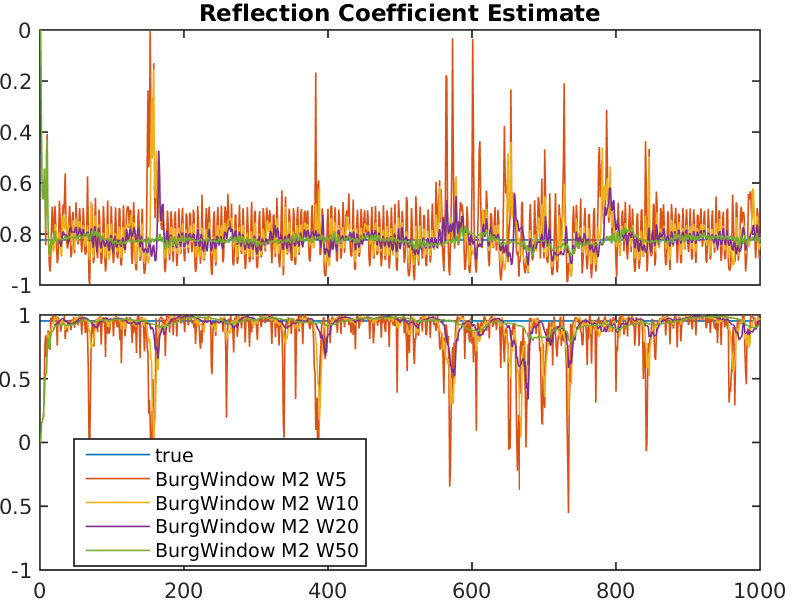

In [7]:
k_true = repmat(k_est,1,nsamples);

figure;
plot_reflection_coefs(lattice, k_true);